In [31]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [32]:
# 1. Cargar el dataset de Iris
iris = load_iris()
X = iris.data  # Características (features)
y = iris.target  # Etiquetas (labels)

# 2. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [33]:
from sklearn.ensemble import RandomForestClassifier

# 3. Crear y entrenar el modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [34]:
from sklearn.metrics import accuracy_score

# 4. Hacer predicciones
y_pred = model.predict(X_test)

# 5. Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

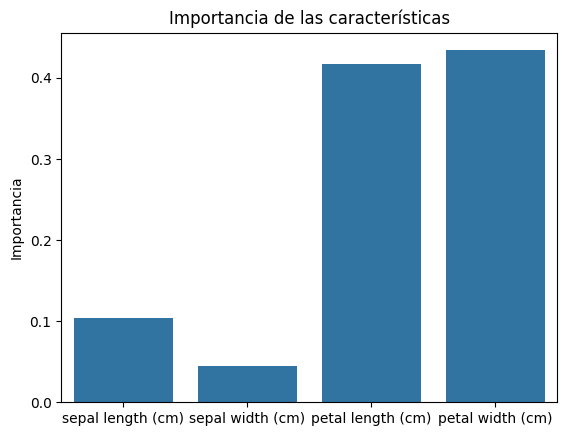

['mi_modelo_entrenado.pkl']

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# 6. Visualizar la importancia de las características
feature_importances = model.feature_importances_
features = iris.feature_names

# Crear un gráfico de barras
sns.barplot(x=features, y=feature_importances)
plt.title("Importancia de las características")
plt.ylabel("Importancia")
plt.show()


joblib.dump(model, 'mi_modelo_entrenado.pkl')

In [36]:
import joblib
import cv2
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Cargar el modelo entrenado
model = joblib.load('mi_modelo_entrenado.pkl')  # Reemplaza con la ruta de tu modelo

# 2. Cargar la imagen
img = cv2.imread('./Imagenes/Flor 1.jpg', cv2.IMREAD_GRAYSCALE)  # Cambia la ruta a la correcta

# Verifica si la imagen se cargó correctamente
if img is None:
    print("Error: No se pudo cargar la imagen. Verifica la ruta.")
else:
    # Redimensionar la imagen a un tamaño adecuado
    img = cv2.resize(img, (64, 64))  # Redimensionar a 64x64 píxeles (ajústalo según necesites)

    # Extraer características HOG de la imagen
    features, hog_image = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

    # Escalar las características (si lo hiciste al entrenar el modelo)
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features.reshape(-1, 1))

    # 3. Reducir las características a las 4 que el modelo espera con PCA
    pca = PCA(n_components=4)  # Reducir a 4 características
    features_pca = pca.fit_transform(features_scaled.reshape(1, -1))  # Reducción de características

    # 4. Hacer la predicción con el modelo cargado
    prediccion = model.predict(features_pca)  # Predecir la clase con las características reducidas

    # 5. Mostrar el resultado de la predicción
    print(f"La especie predicha es: {prediccion[0]}")


ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'